# Consolidate all models and make cross models comparison

## Define device for Torch - preferred CUDA for accelerated computation

In [25]:
# Matplotlib
import torch

# Define device for torch
use_cuda = True
print("CUDA is available:", torch.cuda.is_available())
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

CUDA is available: True


## Load test dataset and dataloader

In [26]:

from utils.dataset import (
    load_dataset,
    CustomDataset
)
from torch.utils.data import Dataset, DataLoader

In [27]:
# Load dataset from file
train_file_path = './dataset/train/DailyDelhiClimateTrain.csv'
test_file_path = './dataset/test/DailyDelhiClimateTest.csv'
train_data, test_data, stats = load_dataset(train_path=train_file_path, 
                                            test_path=test_file_path)

In [28]:
# Define batch size
batch_size = 128
n_inputs = 30
n_outputs = 7

# Random number generator (for reproducibility)
generator = torch.Generator()  # Defaults to CPU, which DataLoader expects

test_dataset = CustomDataset(test_data, n_inputs, n_outputs)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,  # Important: don't shuffle test data
    generator=generator
)

## Load models for evaluation and visualization

### Model 1: Seq2Seq Non Autoregressive model using LSTM

#### Load model

In [29]:
import torch

# Step 1: Rebuild the model architecture
from model_architecture_definition.seq2seq_non_autoregressive_LSTM import Seq2SeqLSTM  # update this line accordingly

# Hyperparameters
input_size = 4 
hidden_size = 200
output_size = 4
learning_rate = 0.001
num_layers = 2
dropout_rate = 0.1
n_outputs=7

# Initialize Seq2Seq Model
seq2seq_model_non_autoreg_lstm = Seq2SeqLSTM(input_size=input_size,
                            output_size=output_size,
                            hidden_size = hidden_size, \
                            output_length=n_outputs,
                            num_layers=num_layers).to(device)

seq2seq_model_non_autoreg_lstm.load_state_dict(torch.load('./models_weights_storage/seq2seq_non_autoregressive_LSTM.pth'))
seq2seq_model_non_autoreg_lstm.eval()  # important for inference mode


Seq2SeqLSTM(
  (encoder): EncoderLSTM(
    (lstm): LSTM(4, 200, num_layers=2)
  )
  (decoder): DecoderLSTM(
    (lstm): LSTM(4, 200, num_layers=2)
    (linear): Linear(in_features=200, out_features=4, bias=True)
  )
)

#### Load loss curve

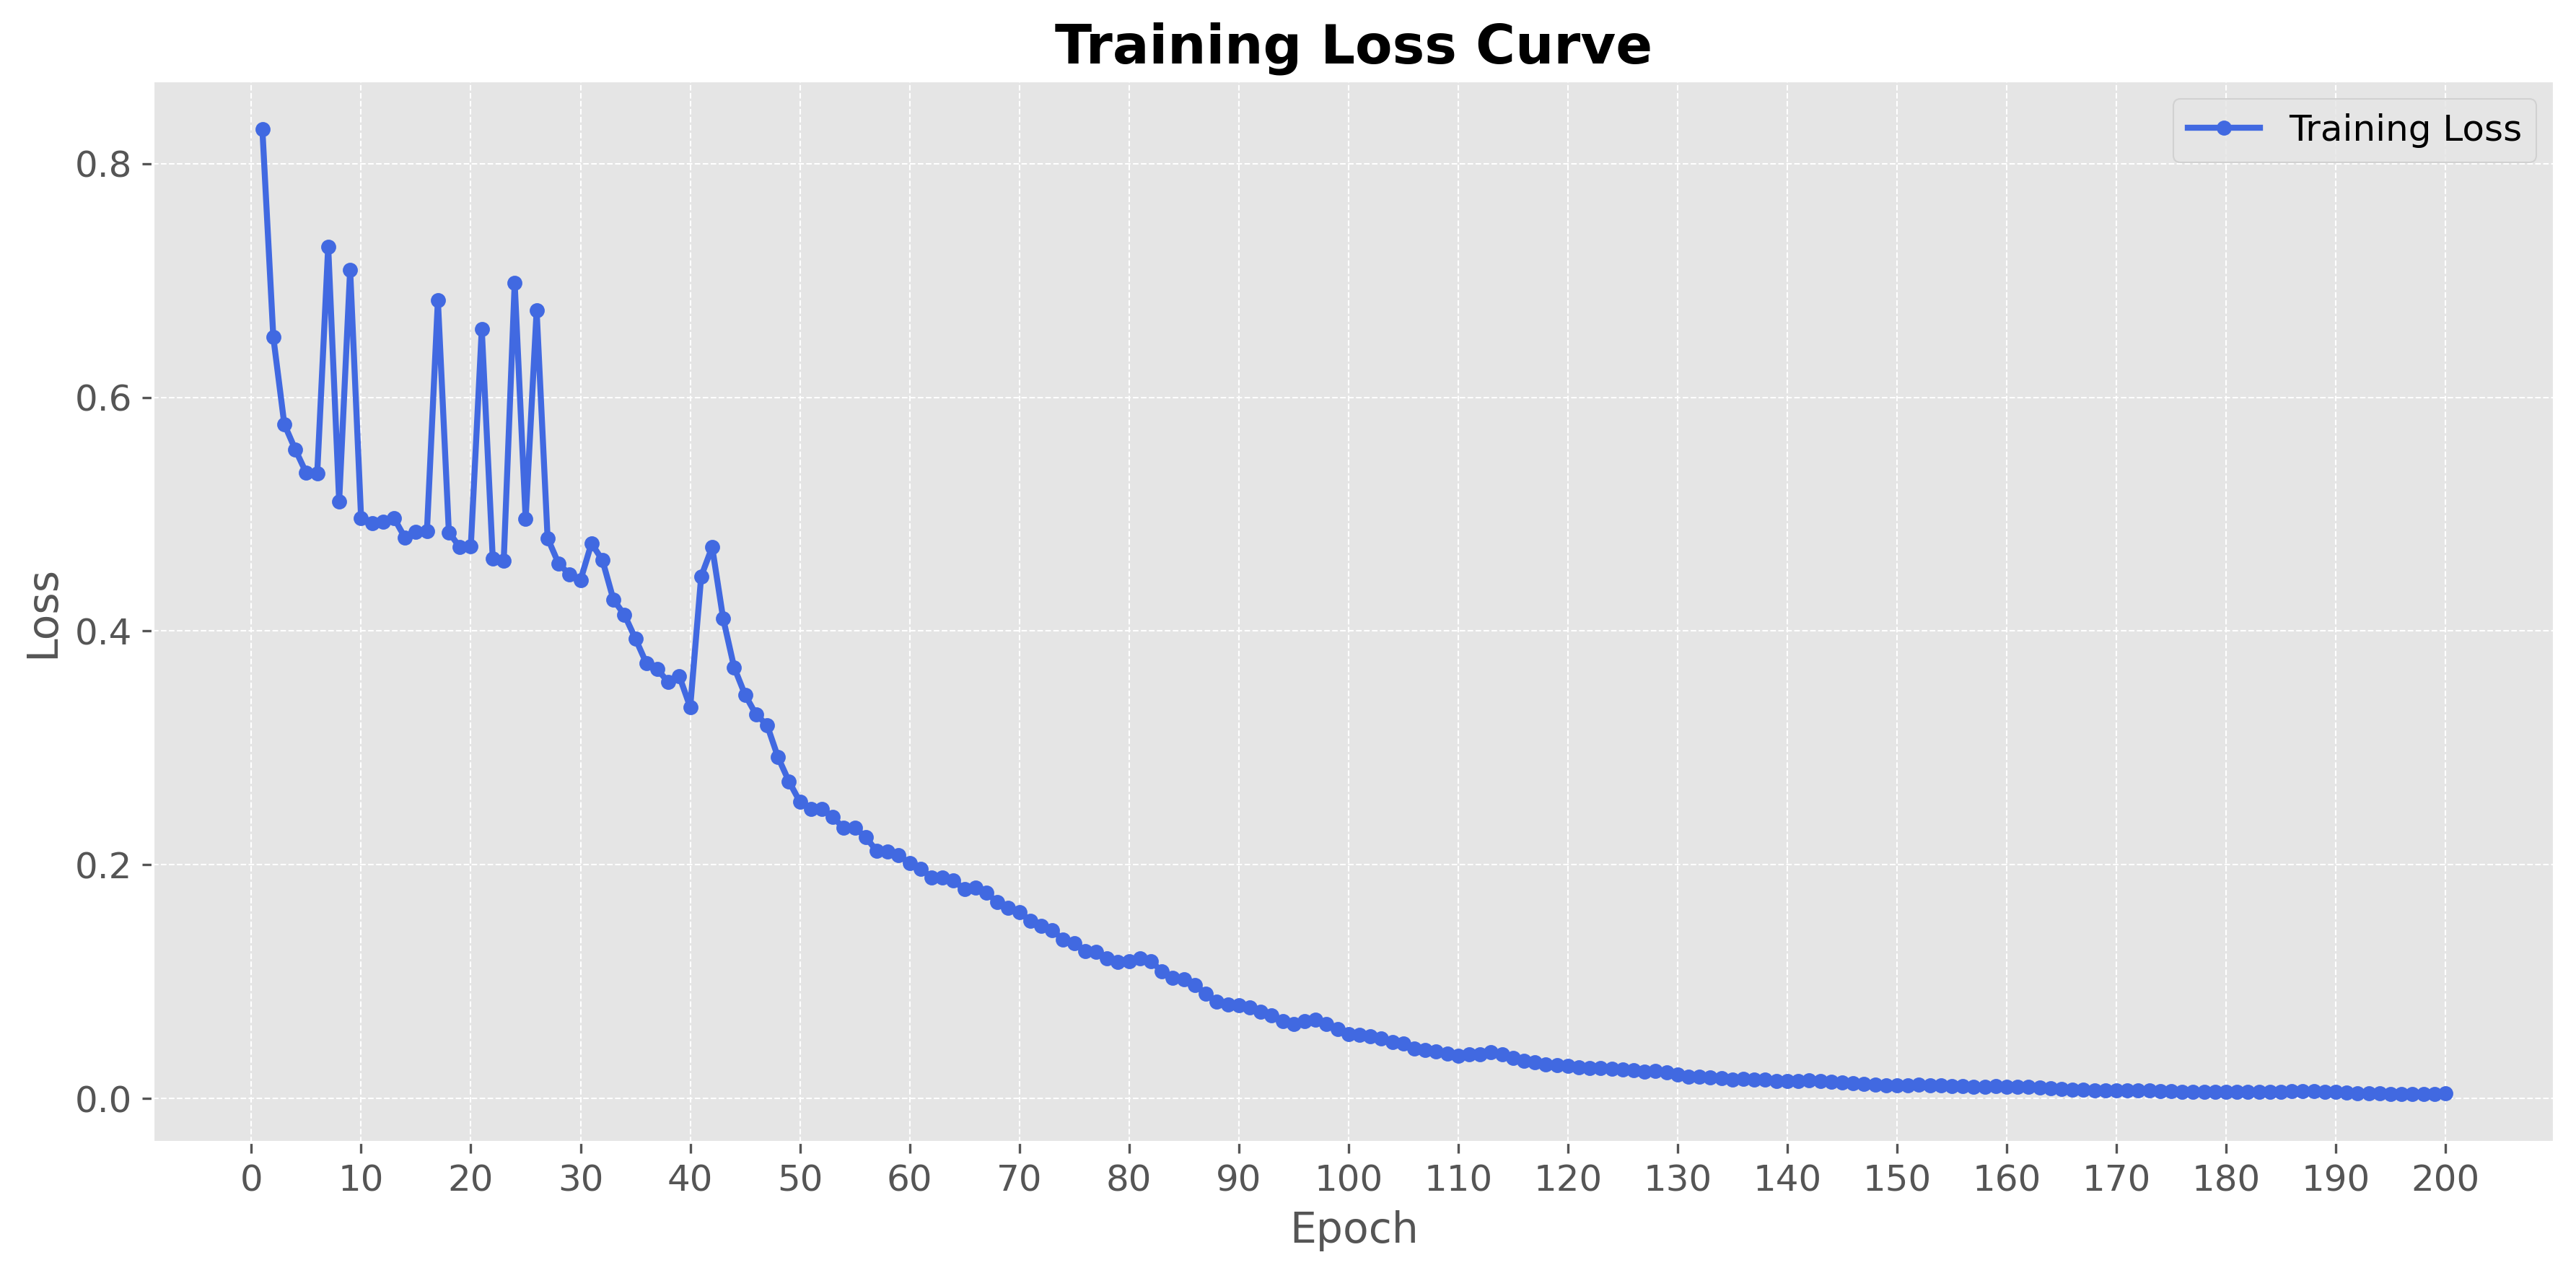

In [30]:
from utils.utils import load_image

image_path='./images_model_training_and_eval/seq2seq_non_autoregressive_LSTM_loss_training_curve.png'

load_image(image_path)

#### Model evaluation

In [31]:
from utils.model_evalation import model_evaluation_and_visualizations

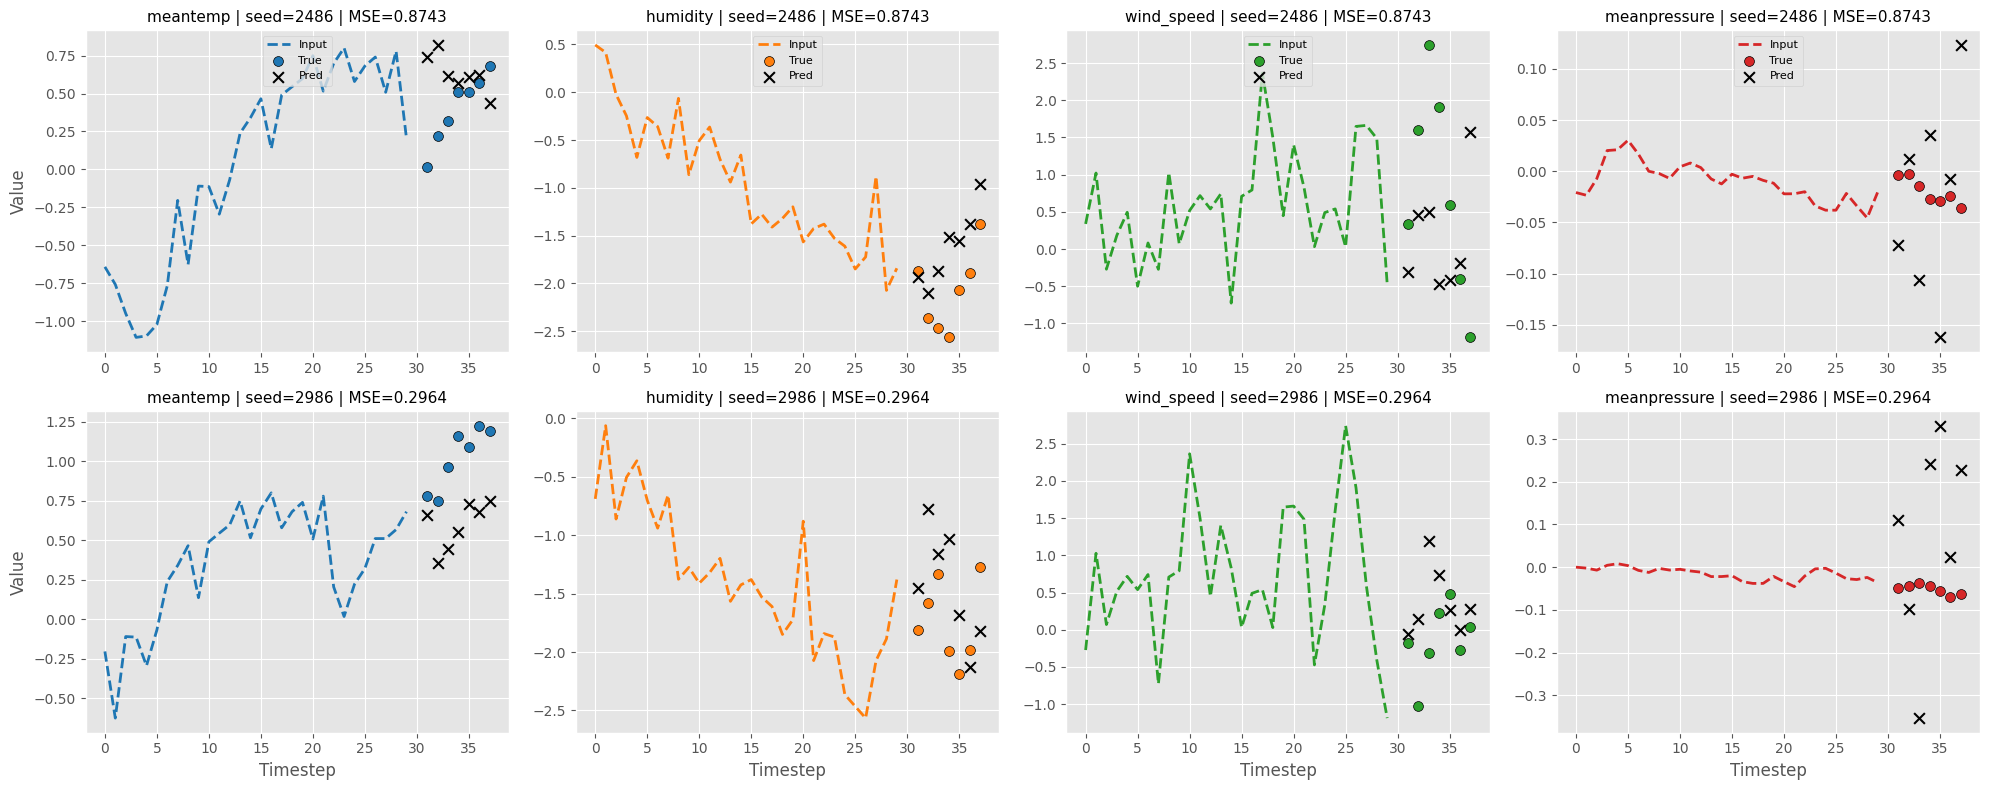

In [32]:
# Visualize
model_evaluation_and_visualizations(seq2seq_model_non_autoreg_lstm, test_dataloader, device)

### Model 2: Seq2Seq Autoregressive model using LSTM

#### Load model

In [33]:
import torch

# Step 1: Rebuild the model architecture
from model_architecture_definition.seq2seq_non_autoregressive_LSTM import Seq2SeqLSTM  # update this line accordingly

# Hyperparameters
input_size = 4 
hidden_size = 200
output_size = 4
learning_rate = 0.001
num_layers = 2
dropout_rate = 0.1
n_outputs=7

# Initialize Seq2Seq Model
seq2seq_model_autoreg_lstm = Seq2SeqLSTM(input_size=input_size,
                            output_size=output_size,
                            hidden_size = hidden_size, \
                            output_length=n_outputs,
                            num_layers=num_layers).to(device)

seq2seq_model_autoreg_lstm.load_state_dict(torch.load('./models_weights_storage/seq2seq_autoregressive_LSTM.pth'))
seq2seq_model_autoreg_lstm.eval()  # important for inference mode


Seq2SeqLSTM(
  (encoder): EncoderLSTM(
    (lstm): LSTM(4, 200, num_layers=2)
  )
  (decoder): DecoderLSTM(
    (lstm): LSTM(4, 200, num_layers=2)
    (linear): Linear(in_features=200, out_features=4, bias=True)
  )
)

#### Load loss curve image

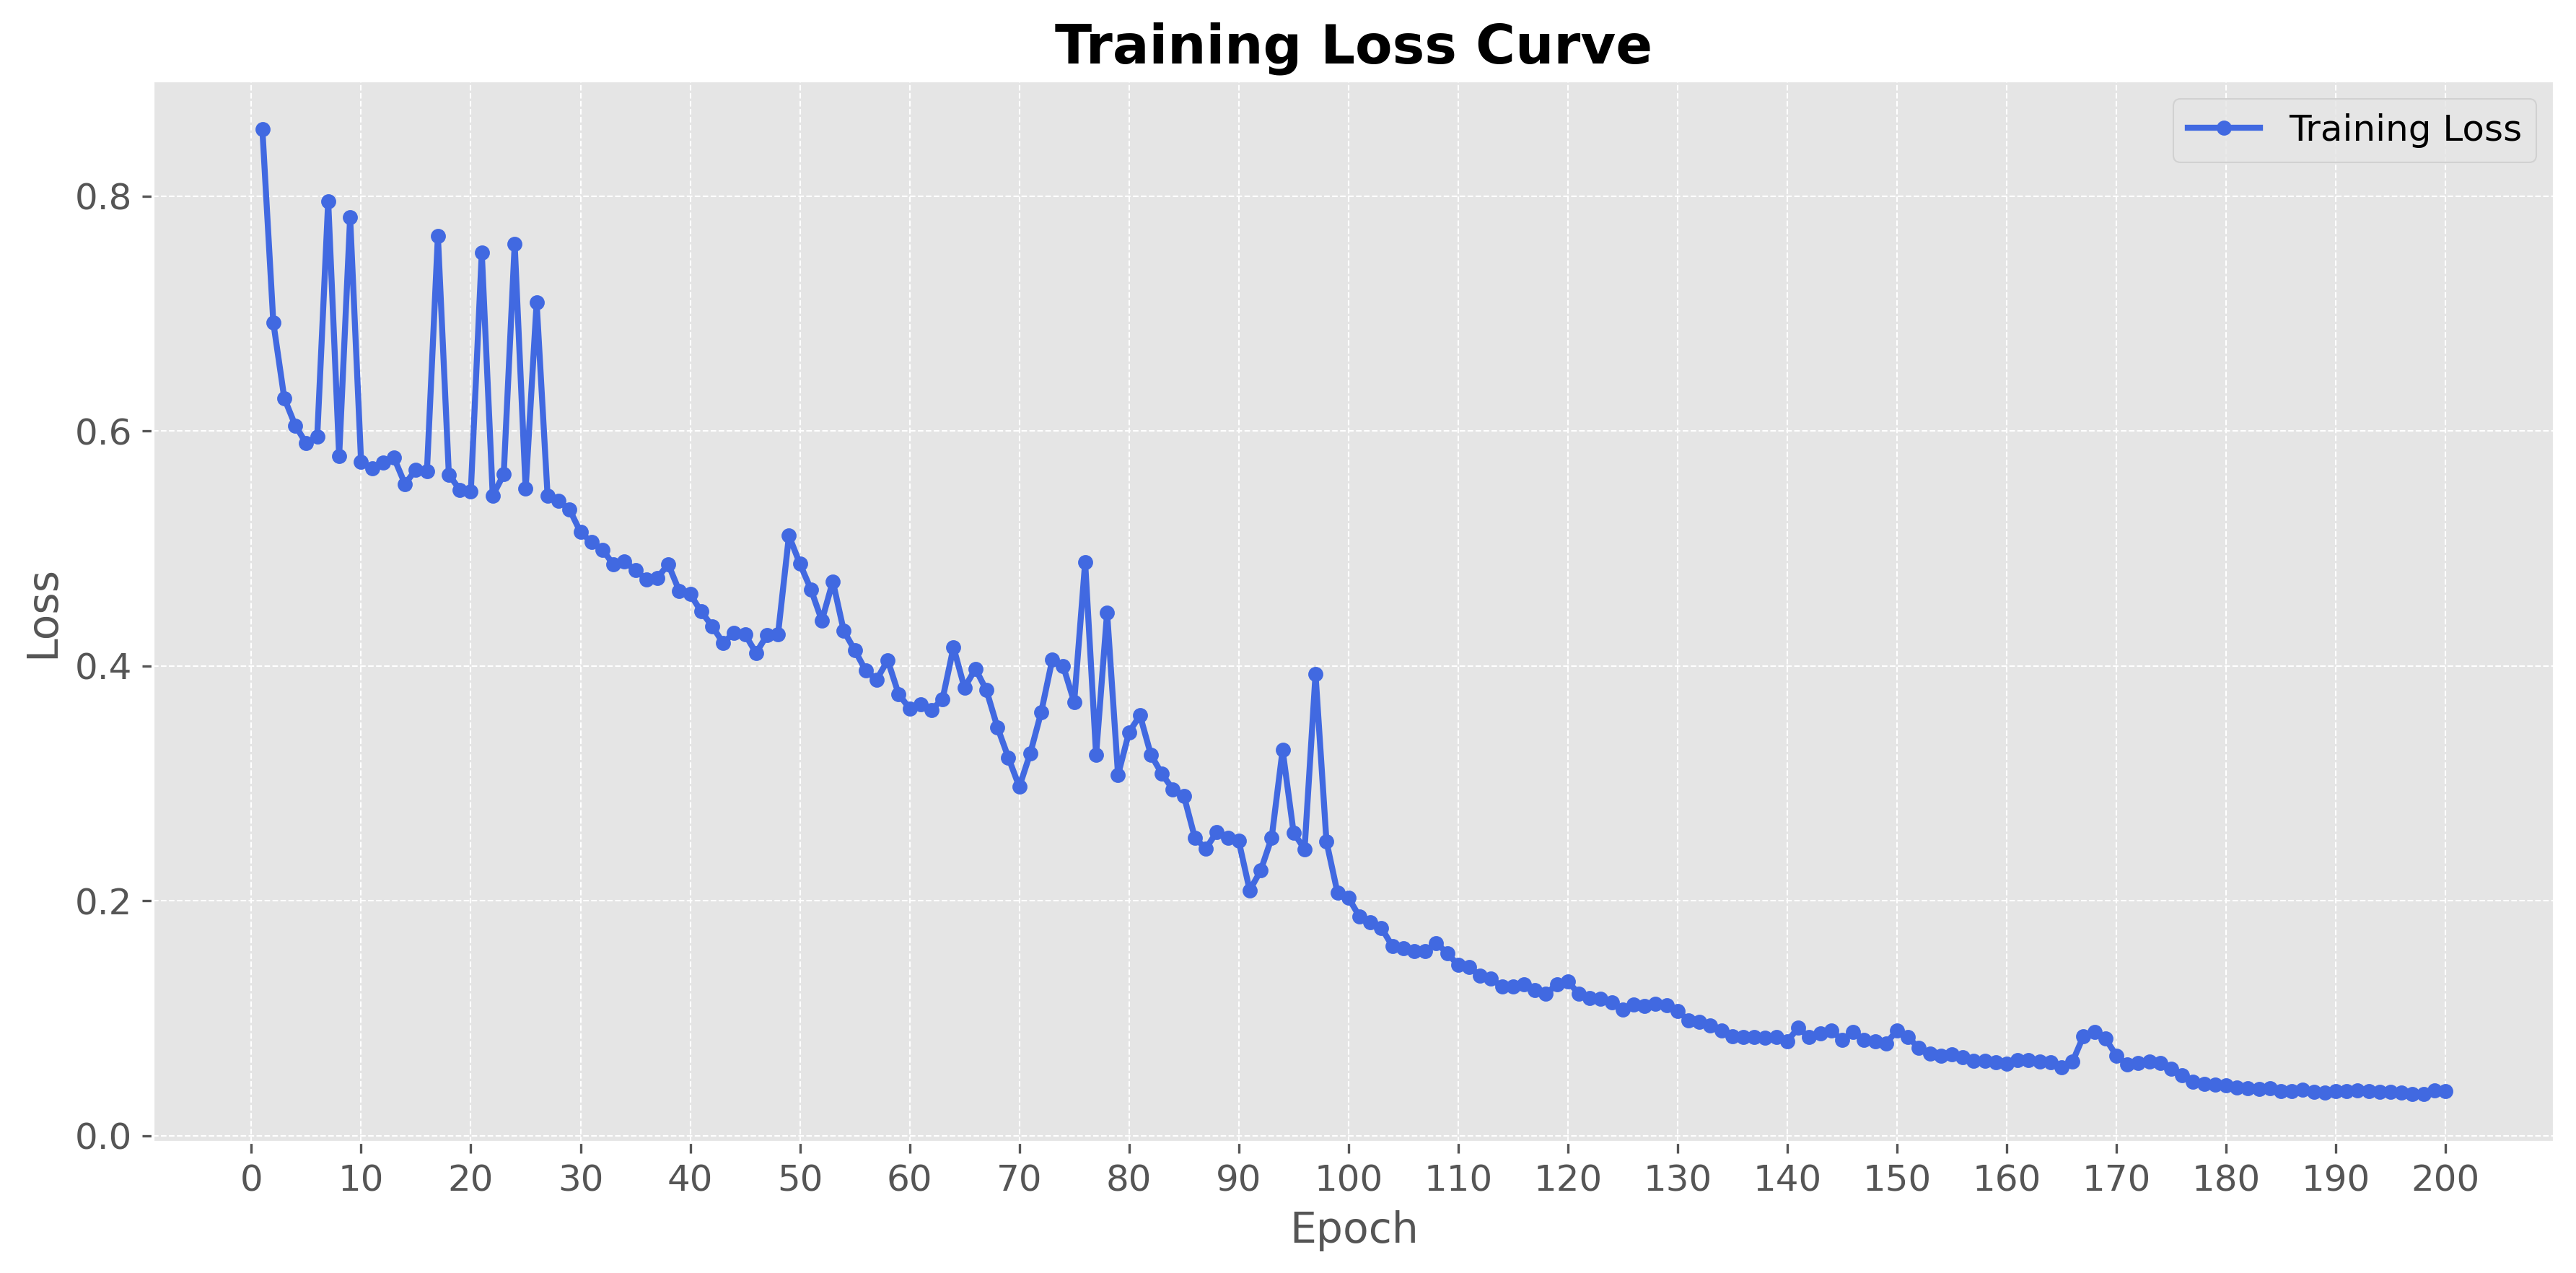

In [34]:
from utils.utils import load_image

image_path='./images_model_training_and_eval/seq2seq_autoregressive_LSTM_loss_training_curve.png'

load_image(image_path)

#### Model evaluation

In [35]:
from utils.model_evalation import model_evaluation_and_visualizations

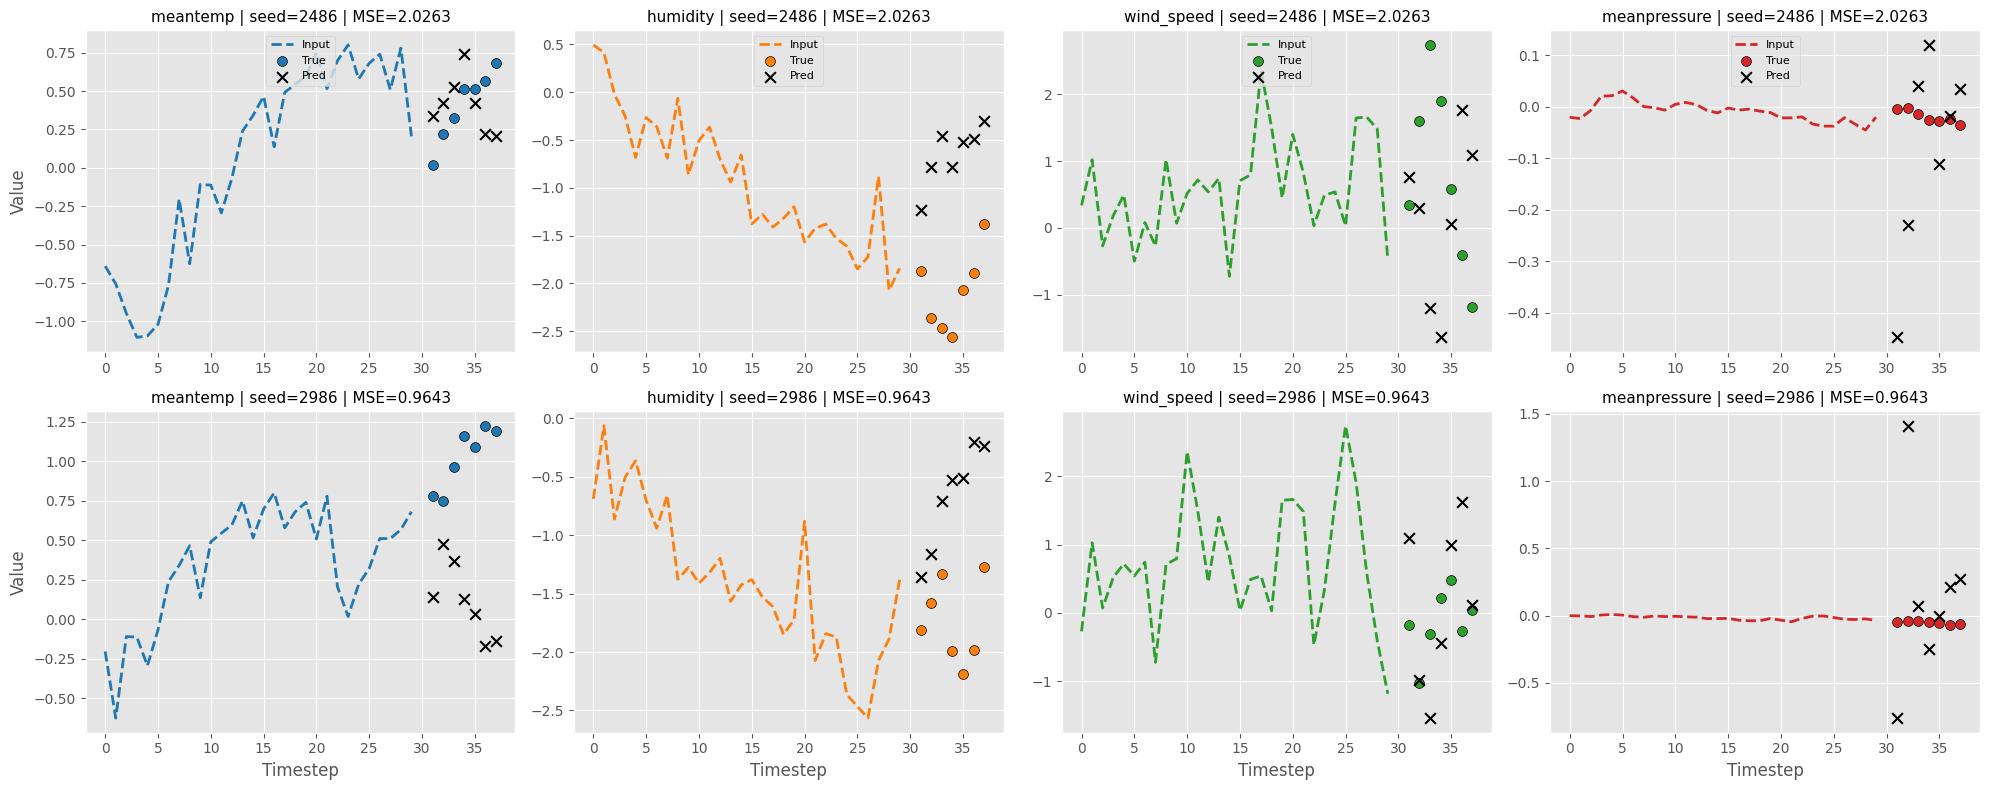

In [36]:
# Visualize
model_evaluation_and_visualizations(seq2seq_model_autoreg_lstm, test_dataloader, device)